In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

1. K-Mean for all features with K = 4

   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


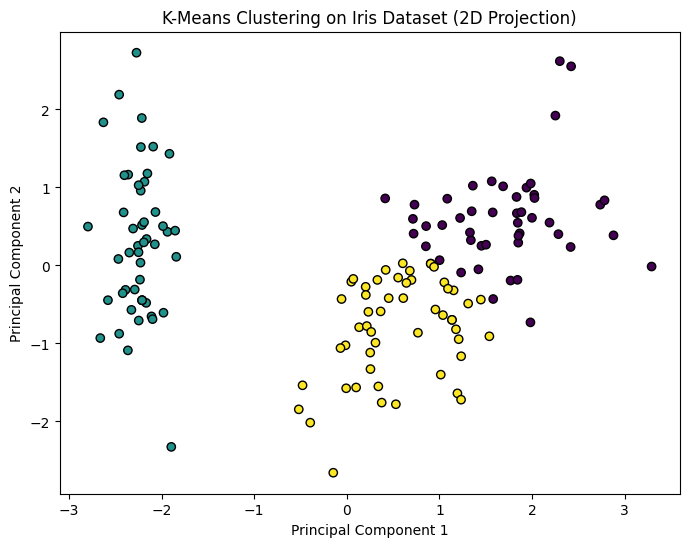

Silhouette Score: 0.454
Clustering Accuracy: 0.832


In [19]:
# Load the dataset (adjust path as necessary for your local machine)
df = pd.read_csv('iris.txt', delimiter=",")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
print(df.head())

# Selecting only numerical features
X = df.iloc[:, :-1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

# Visualize clusters using PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Iris Dataset (2D Projection)")
plt.show()

# Compute the silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# ---------- Accuracy Computation with Labeled Data ----------

# Convert the true species labels to numeric values
true_labels, uniques = pd.factorize(df["species"])
# Build the confusion matrix between clusters and true labels
num_clusters = len(np.unique(clusters))
num_classes = len(uniques)
conf_matrix = np.zeros((num_clusters, num_classes), dtype=int)
for i in range(len(true_labels)):
    conf_matrix[clusters[i], true_labels[i]] += 1

# Solve the linear assignment problem to find the best mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(row_ind, col_ind))

# Map each cluster to the corresponding true label based on the best assignment
mapped_labels = np.zeros_like(clusters)
for cluster, label in mapping.items():
    mapped_labels[clusters == cluster] = label

# Calculate the accuracy
acc = accuracy_score(true_labels, mapped_labels)
print(f"Clustering Accuracy: {acc:.3f}")

2. Find optimal K value without 